<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

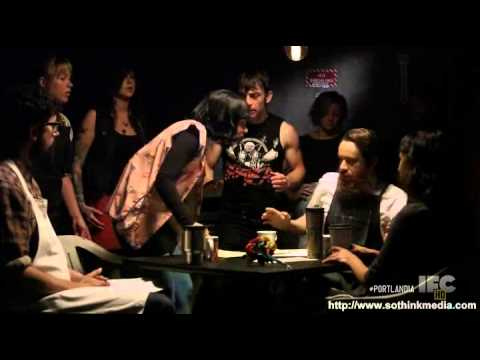

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/guillermo/Documents/repos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## Let's clean our data first
### Clue: "The text is fairly raw: dates in the review, extra words in the star_rating column, etc"

In [4]:
shops_cleaned = shops.copy()

In [5]:
shops['full_review_text'].apply(lambda x: x.split(" ")[1]).isna().value_counts()

False    7616
Name: full_review_text, dtype: int64

In [6]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
shops['star_rating'].apply(lambda x: x.split(" ")[1]).value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [8]:
shops['coffee_shop_name'].value_counts().head()

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Houndstooth Coffee                 200
Venezia Italian Gelato             200
Name: coffee_shop_name, dtype: int64

In [9]:
# Checking for empty reviews
(shops['full_review_text'] == '').value_counts()

False    7616
Name: full_review_text, dtype: int64

In [10]:
shops_cleaned['date_reviewed'] = shops['full_review_text'].apply(lambda x: x.split(" ")[1])

In [11]:
shops_cleaned['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split(" ")[2:]))

In [12]:
shops_cleaned['star_rating'] = shops['star_rating'].apply(lambda x: float(x.split(" ")[1]))

In [13]:
print(shops_cleaned.shape)
shops_cleaned.head()

(7616, 4)


,coffee_shop_name,full_review_text,star_rating,date_reviewed
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Attributes of a good token:

1. Stored in iterable data structure
2. All the same case
3. Free of non-alphanumeric characters (ie. punctuation, whitespace)

In [14]:
import re

In [15]:
def tokenize(text):
    """ 
    Parses a string into a list of semantic units.
    
    Args: 
        text(str): String that the funciton will tokenize.
        
    Returns:
        list: Tokens parsed out by mechanics below.
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [16]:
shops_cleaned['full_review_text'].apply(lambda x: tokenize(x))

0       [1, checkin, love, love, loved, the, atmospher...
1       [listed, in, date, night, austin, ambiance, in...
2       [1, checkin, listed, in, brunch, spots, i, lov...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [1, checkin, they, are, located, within, the, ...
5       [1, checkin, very, cute, cafe, i, think, from,...
6       [2, checkins, listed, in, nuptial, coffee, bli...
7       [2, checkins, love, this, place, 5, stars, for...
8       [1, checkin, ok, lets, try, this, approach, pr...
9       [3, checkins, this, place, has, been, shown, o...
10      [1, checkin, listed, in, americano, this, is, ...
11      [the, store, has, a, decoration, but, honestly...
12      [1, checkin, listed, in, 2016, the, third, tim...
13      [this, is, such, a, cute, little, cafe, ive, d...
14      [beautiful, eccentric, coffee, shop, with, a, ...
15      [1, checkin, listed, in, in, search, of, fanta...
16      [really, love, the, atmosphere, here, i, frequ...
17      [1, ch

In [17]:
shops_cleaned['raw_python_tokens'] = shops_cleaned['full_review_text'].apply(lambda x: tokenize(x))

In [18]:
print(shops_cleaned.shape)
shops_cleaned.head()

(7616, 5)


,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


## Can you visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [19]:
# RAW PYTHON METHOD

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
shops_cleaned.head(2)

,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."


In [21]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [22]:
wc = count(shops_cleaned['raw_python_tokens'])

In [23]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
21,the,6847,34809,1.0,0.044975,0.044975,0.899028
7,and,6864,26650,2.0,0.034433,0.079408,0.901261
61,a,6246,22755,3.0,0.029401,0.108809,0.820116
54,i,5528,20237,4.0,0.026147,0.134956,0.725840
40,to,5653,17164,5.0,0.022177,0.157132,0.742253


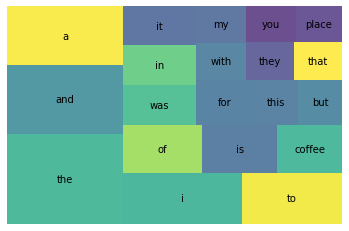

In [24]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [25]:
# SPACEY METHOD

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [26]:
print(shops_cleaned.shape)
shops_cleaned.head()

(7616, 5)


,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [27]:
# Tokenizer Pipe (CHANGE W/ SPACEY & IT GETS EASIER!)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops_cleaned['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops_cleaned['spacey_tokens'] = tokens

In [28]:
shops_cleaned.head()

,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens,spacey_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, check-in, Love, love, loved, the, atmosphe..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check-in, Listed, in, Brunch, Spots, I, lo..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[Very, cool, decor!, Good, drinks, Nice, seati..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, check-in, They, are, located, within, the,..."


In [29]:
wc = count(shops_cleaned['spacey_tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,the,6520,27779,1.0,0.034993,0.034993,0.856092
9,and,6804,25748,2.0,0.032434,0.067427,0.893382
64,a,6181,22085,3.0,0.027820,0.095247,0.811581
24,I,5469,19780,4.0,0.024916,0.120163,0.718093
41,to,5631,16904,5.0,0.021294,0.141457,0.739364


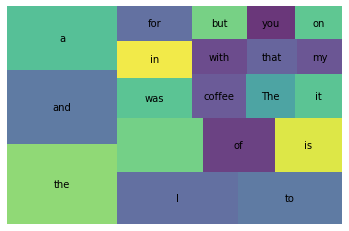

In [30]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [31]:
# NO CAPS INCLUDED FOR SPACEY

In [32]:
# REMOVING STOP WORDS (NOT OBVIOUSLY USEFUL FOR OUR ANALYSIS)
# Includes: conjunctions, articles, adverbs, pronouns, common verbs
# Note: best practice is to personalize these depending on the problem (ie. "patient" in medical study)

In [33]:
# DEFAULT STOP WORDS
# nlp.Defaults.stop_words # python type = SET

In [34]:
# Lemmatization - included by default in Spacy
# RUNS SLOW
# def get_lemmas(text):

#     lemmas = []
    
#     doc = nlp(text)
    
#     for token in doc: 
#         if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
#             lemmas.append(token.lemma_)
    
#     return lemmas

In [35]:
# shops_cleaned['spacey_tokens'] = shops_cleaned['full_review_text'].apply(get_lemmas)

# print(shops_cleaned.shape)
# shops_cleaned.head()

In [36]:
# wc = count(shops_cleaned['spacey_tokens'])
# wc.head()

In [37]:
# wc_top20 = wc[wc['rank'] <= 20]

# squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
# plt.axis('off')
# plt.show()

In [73]:
# EXTENDING STOP WORDS
STOP_WORDS = nlp.Defaults.stop_words.union(["check", "1", "coffee", "the"])

In [74]:
# Lemmatization - included by default in Spacy
# RUNS SLOW
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_space == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [75]:
# shops_cleaned['spacey_tokens'] = shops_cleaned['full_review_text'].apply(get_lemmas)

In [76]:
# wc = count(shops_cleaned['spacey_tokens'])
# wc.head()

In [77]:
# wc_top20 = wc[wc['rank'] <= 20]

# squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
# plt.axis('off')
# plt.show()

In [78]:
# "GOOD" COFFEE SHOPS VISUALIZATION
good_shops = shops_cleaned[shops_cleaned['star_rating'] >= 4].copy()

good_shops.head()

,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens,spacey_tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, checkin, love, love, loved, the, atmospher...","[1, check-in, Love, love, loved, the, atmosphe..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check-in, Listed, in, Brunch, Spots, I, lo..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, check-in, They, are, located, within, the,..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4.0,11/20/2016,"[1, checkin, very, cute, cafe, i, think, from,...","[1, check-in, Very, cute, cafe!, I, think, fro..."


In [79]:
good_shops['spacey_tokens'] = good_shops['full_review_text'].apply(get_lemmas)

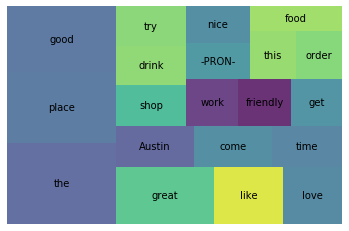

In [80]:
wc = count(good_shops['spacey_tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
'''
Unlike verbs and common nouns, there's no clear base form of a personal pronoun. 
Should the lemma of "me" be "I", or should we normalize person as well, giving "it" — or maybe "he"? 
spaCy's solution is to introduce a novel symbol, -PRON-, which is used as the lemma for all personal pronouns.
'''

In [81]:
# "BAD" COFFEE SHOPS VISUALIZATION
bad_shops = shops_cleaned[shops_cleaned['star_rating'] < 3].copy()

bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,date_reviewed,raw_python_tokens,spacey_tokens
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin...","[Very, cool, decor!, Good, drinks, Nice, seati..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1.0,12/2/2016,"[okay, so, after, visiting, my, friends, in, l...","[Okay,, so, after, visiting, my, friends, in, ..."
39,The Factory - Cafe With a Soul,A cafe that doesn't have Wifi but makes you or...,1.0,12/2/2016,"[a, cafe, that, doesnt, have, wifi, but, makes...","[A, cafe, that, doesn't, have, Wifi, but, make..."
40,The Factory - Cafe With a Soul,"Honestly, this place is having an identity cri...",2.0,11/14/2016,"[honestly, this, place, is, having, an, identi...","[Honestly,, this, place, is, having, an, ident..."
58,The Factory - Cafe With a Soul,This is a tough one for me. I took my childre...,2.0,11/20/2016,"[this, is, a, tough, one, for, me, i, took, my...","[This, is, a, tough, one, for, me., , I, took..."


In [82]:
bad_shops['spacey_tokens'] = bad_shops['full_review_text'].apply(get_lemmas)

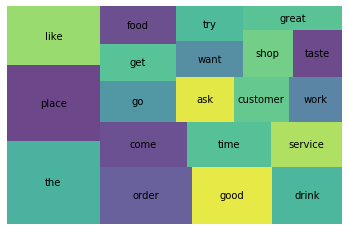

In [83]:
wc = count(bad_shops['spacey_tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

